In [1]:
import _path_init
import numpy as np
from ndsolver.versions.revamped import MM
import matplotlib.pyplot as plt
from numpy import linalg as LA

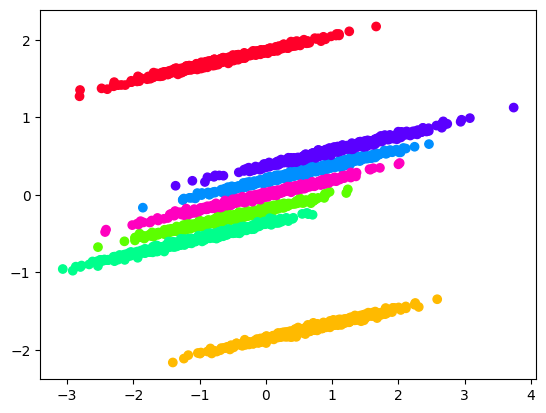

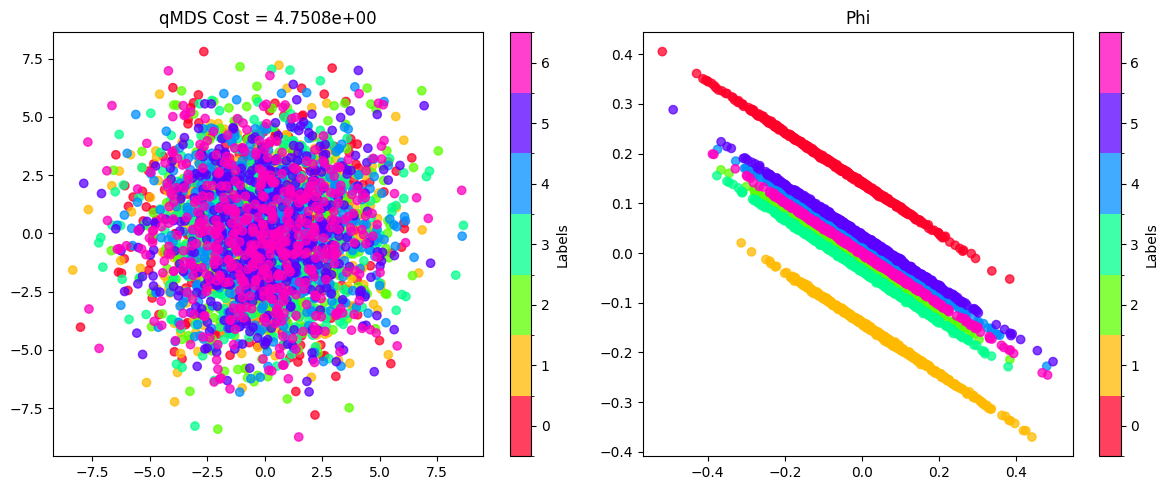

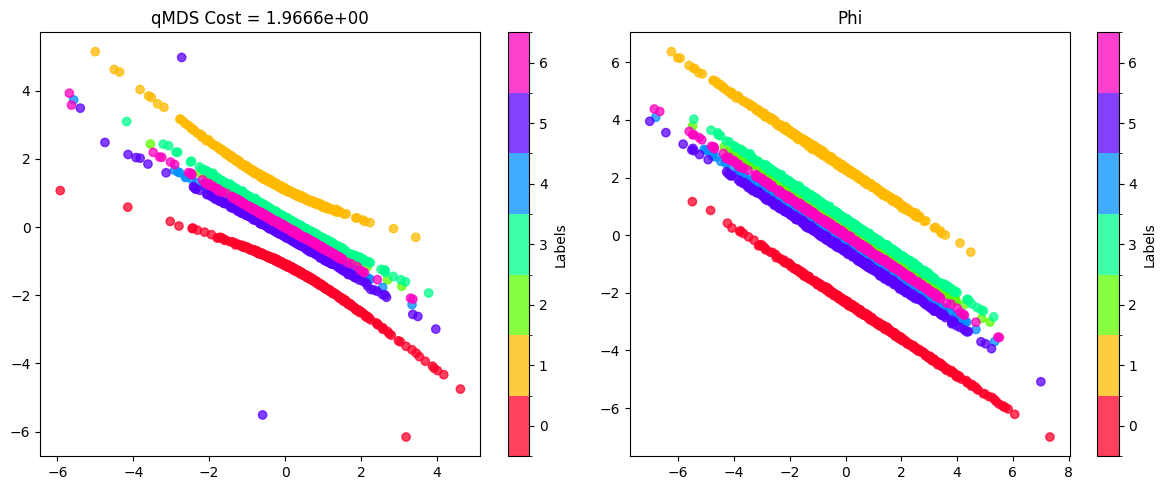

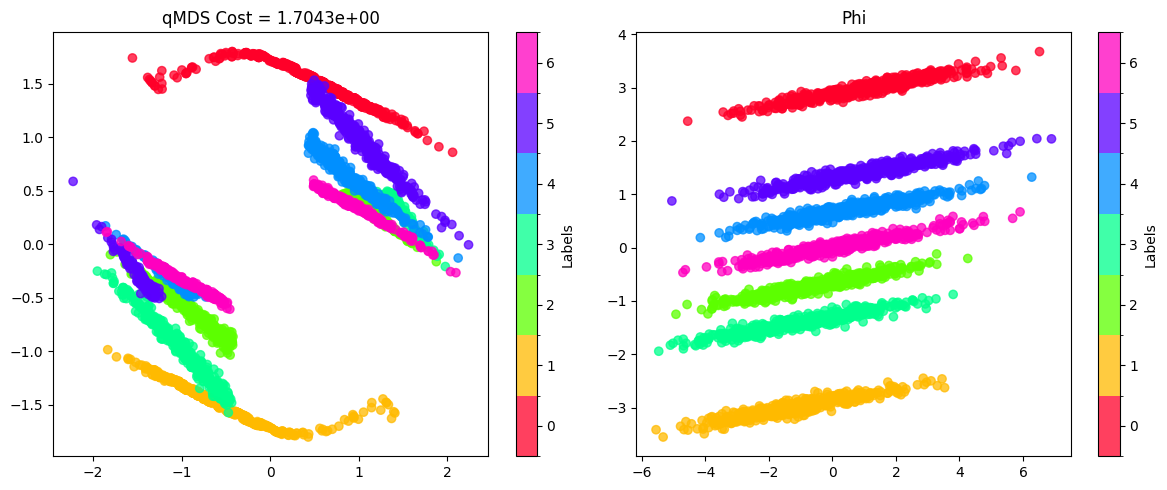

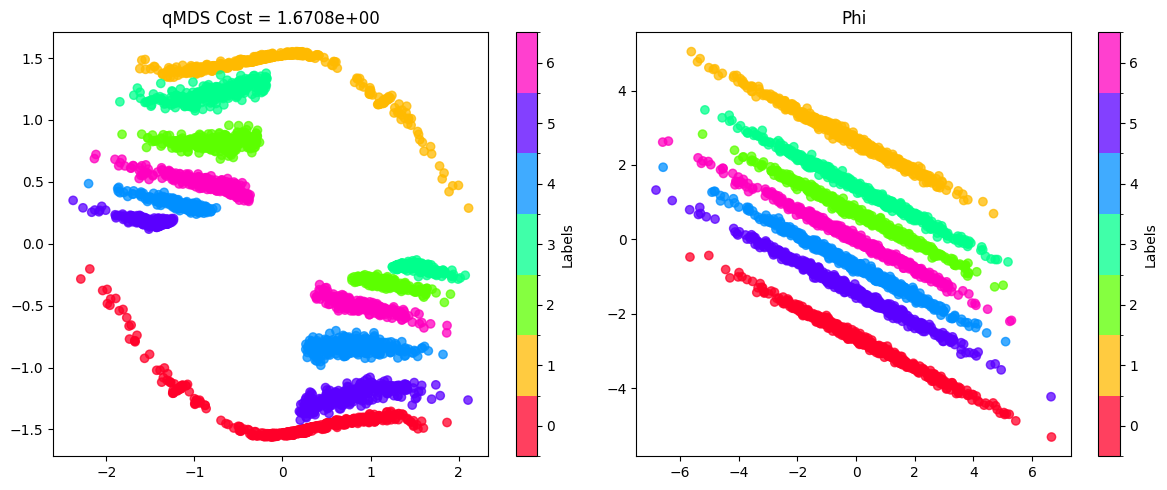

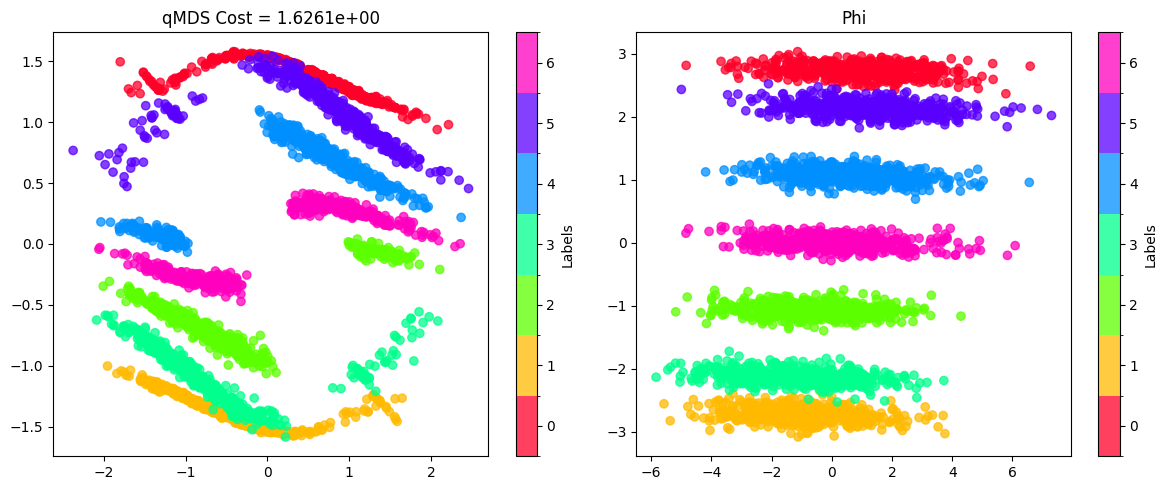

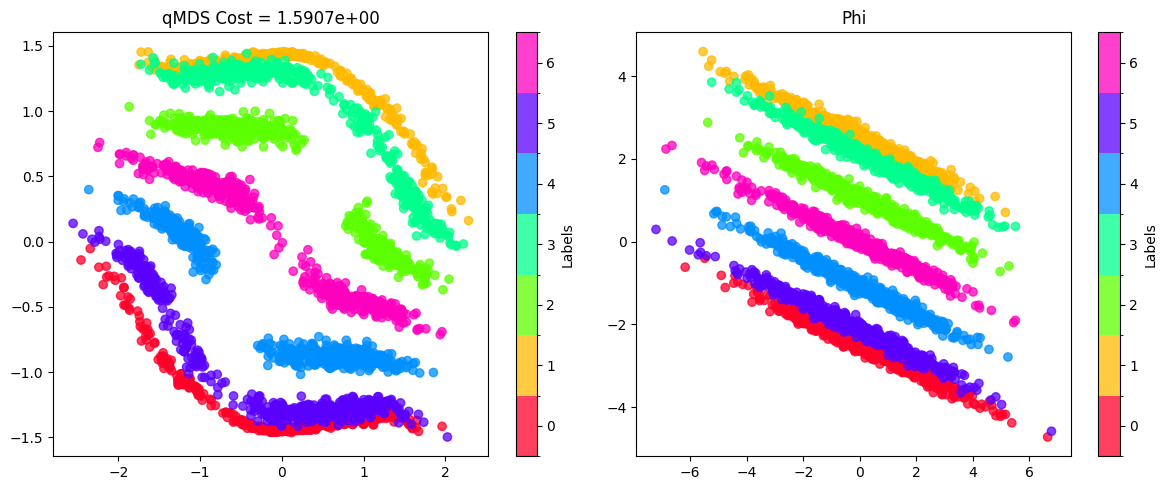

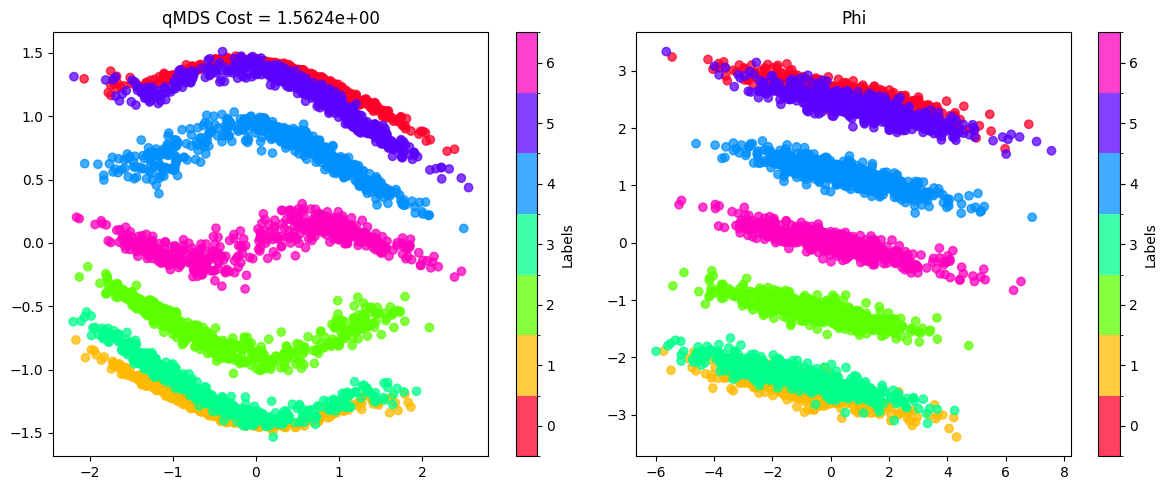

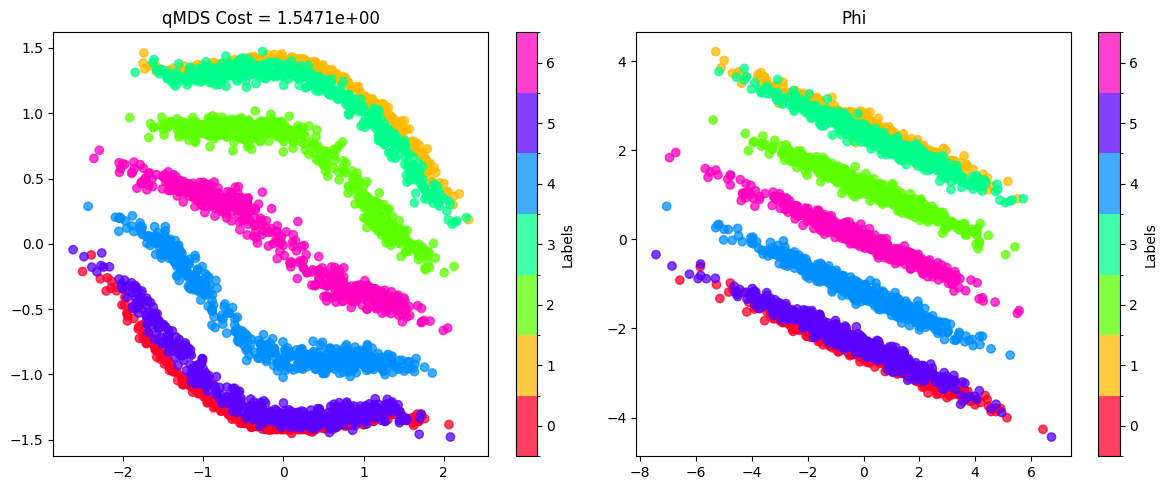

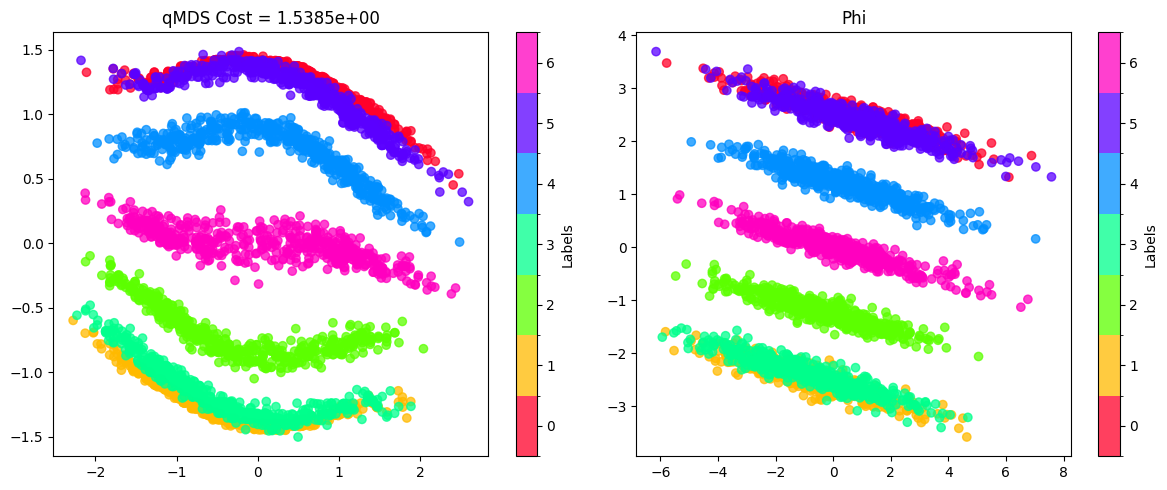

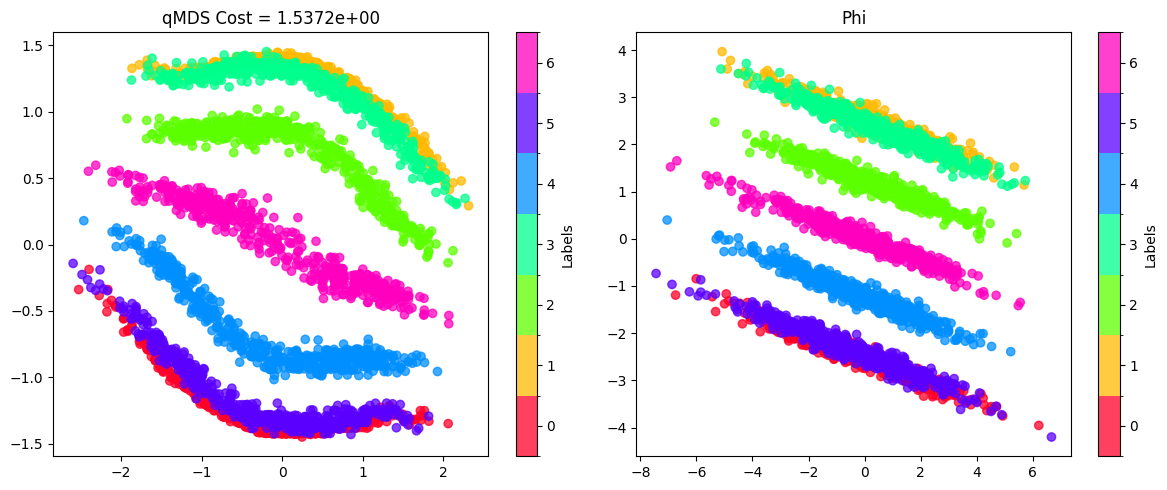

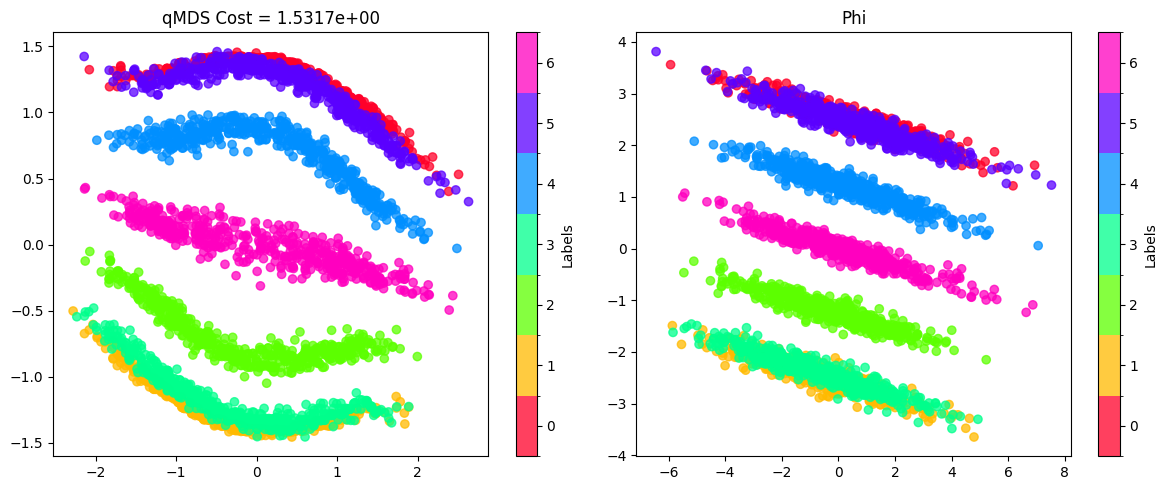

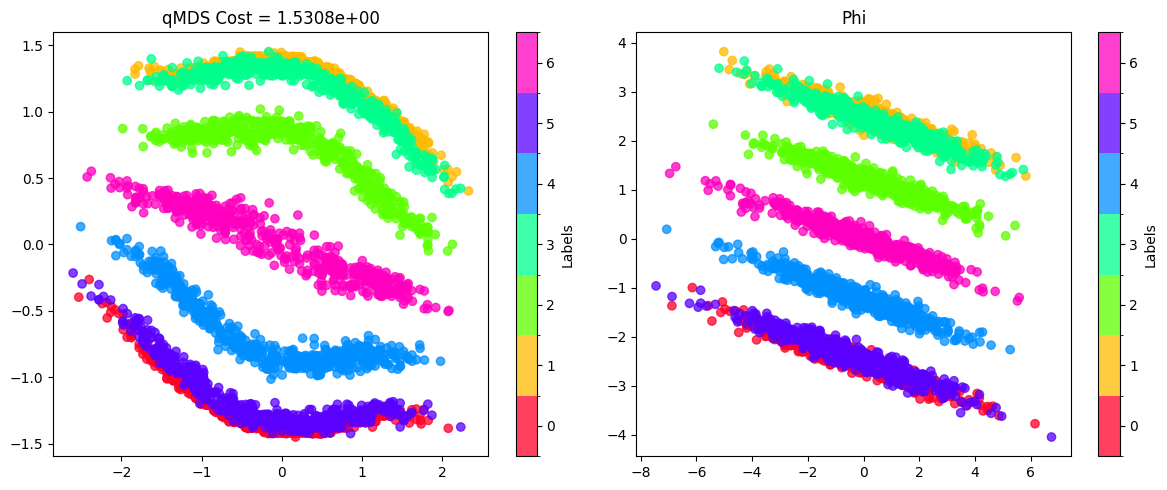

In [2]:

k = 7
d_ = 3
p = 500
distance = 0.01
means = [[distance, 0, 0, 0,0,0], [0, distance, 0,0,0, 0], [0, 0,0,0, distance, 0], [0,0,0, 0, 0, 10*distance], [0, 0,0,distance, 0, 10*distance],[0,0,distance,0, 0, distance]]
means = [[100000000*distance,0,0],[-100000000*distance,0,0],[0,distance,0,],[0,2*distance,0],[0,-distance,0],[0,-2*distance,0],[0,0,0]]
#means = distance*np.random.rand(k,d_)
covs = [distance**(3)*np.eye(d_)] * k


X = np.concatenate([np.random.multivariate_normal(means[i], covs[i], p).T for i in range(k)], axis=1)
X-=np.mean(X,axis =1, keepdims=True)
X/=np.std(X,axis=1,keepdims = True)
labels = np.concatenate([[i] * p for i in range(k)])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(X.T)
plt.scatter(Z.T[0, :], Z.T[1, :], c=labels, cmap='gist_rainbow')
plt.show()

from sklearn.manifold import TSNE



mm = MM(X, labels, init=None, init_scaling_factor = 2.5)
mm.visualize()
mm.update_state(stage_1=True,step_size=0.0001,iterations = 1000)
mm.visualize()
for i in range(10):
    mm.update_state(step_size=0.025,iterations = 1000)
    mm.visualize()
